# A1
**Image Filtering**

150 150
1. Median filters
2. Box filters
3. Gaussian filters
4. Sobel filter
5. Exit


Enter your choice -  1


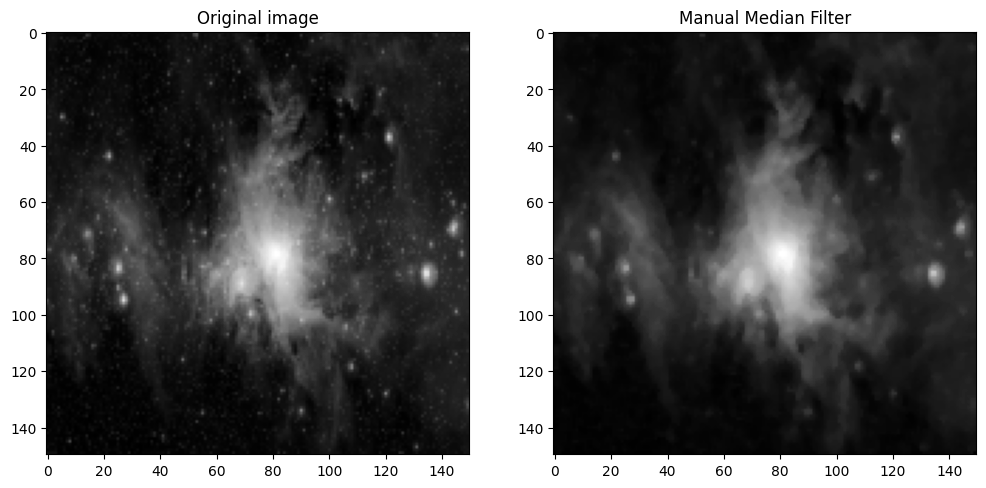

1. Median filters
2. Box filters
3. Gaussian filters
4. Sobel filter
5. Exit


Enter your choice -  2


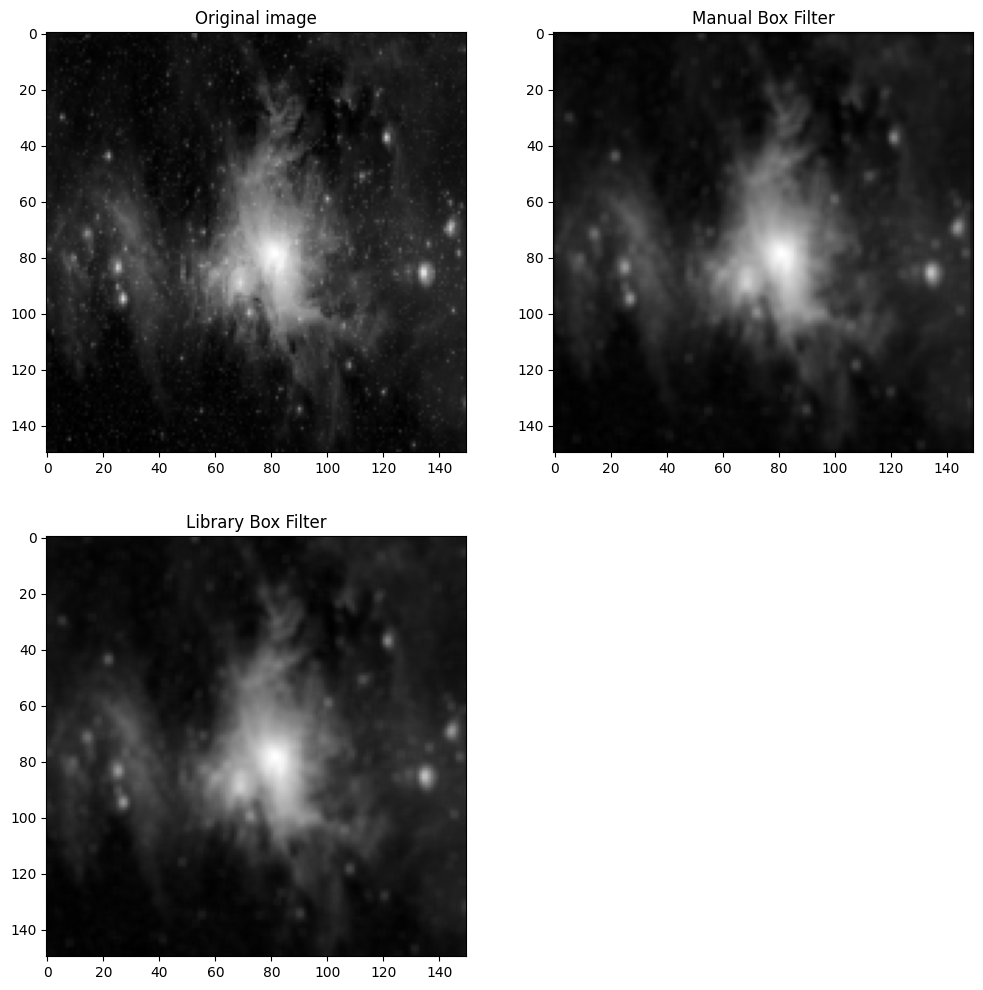

1. Median filters
2. Box filters
3. Gaussian filters
4. Sobel filter
5. Exit


Enter your choice -  3


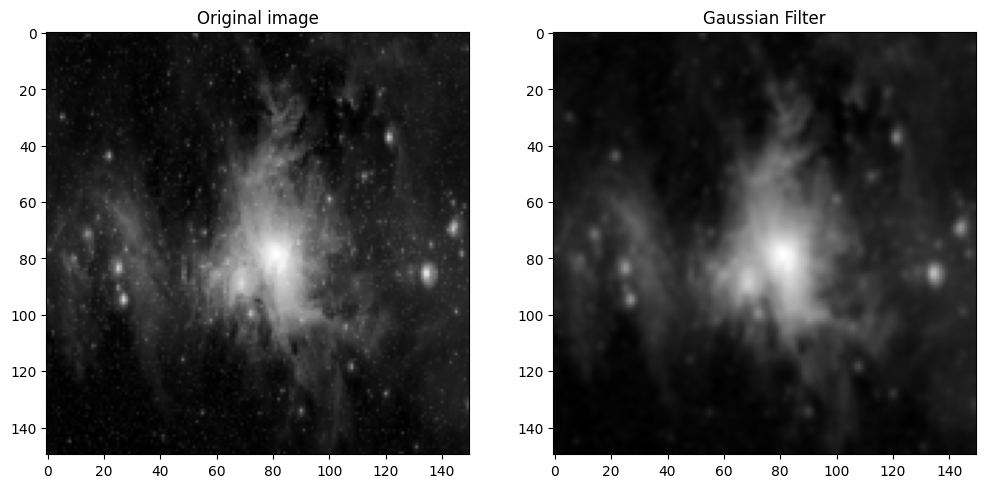

1. Median filters
2. Box filters
3. Gaussian filters
4. Sobel filter
5. Exit


Enter your choice -  4


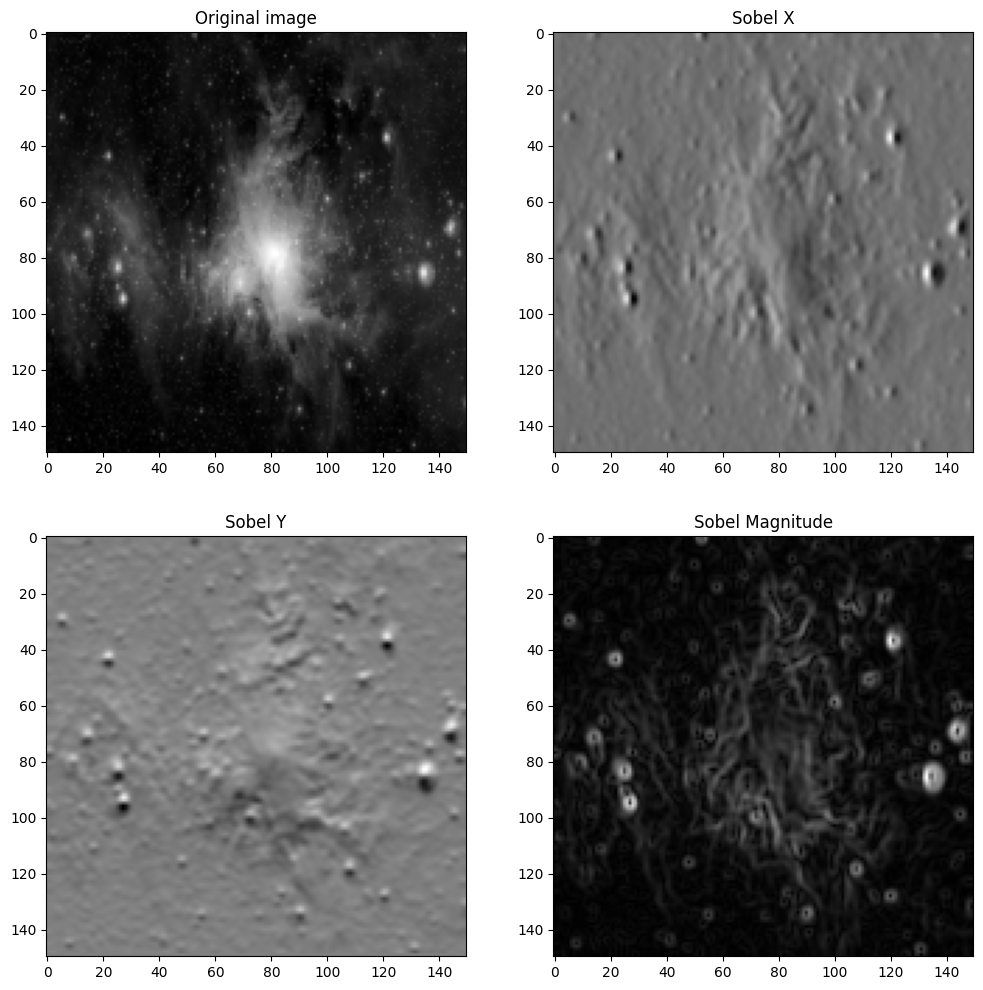

1. Median filters
2. Box filters
3. Gaussian filters
4. Sobel filter
5. Exit


Enter your choice -  5


Exiting the program


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# input image
image = cv2.imread('D://Balance//College and Studies//TY//CV & DL Lab//A1//Space.jpg')

# convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# reshape image
image = cv2.resize(image, (150, 150), interpolation=cv2.INTER_AREA)

r, c = image.shape
print(r, c)

while True:
    print("1. Median filters")
    print("2. Box filters")
    print("3. Gaussian filters")
    print("4. Sobel filter")
    print("5. Exit")

    choice = int(input("Enter your choice - "))

    if choice == 1:
        median_image = np.zeros((r, c))
        padded_image = np.pad(image, pad_width=1,
                              mode='constant', constant_values=0)
        for i in range(r): 
            for j in range(c):
                neighbour = padded_image[i:i+3, j:j+3].flatten()
                neighbour = sorted(neighbour)
                median_image[i, j] = neighbour[4]

        plt.figure(figsize=(12, 12))
        plt.subplot(1, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title("Manual Median Filter")
        plt.imshow(median_image, cmap='gray')
        plt.show()

    elif choice == 2:
        # library
        size = (3, 3)
        box = cv2.boxFilter(image, ddepth=-1, ksize=size)

        # hard code
        box_filter_image = np.zeros((r, c))
        kernel = 3
        padded_image = np.pad(image, pad_width=1,
                              mode='constant', constant_values=0)
        for i in range(r):
            for j in range(c):
                neighbour = padded_image[i:i+kernel, j:j+kernel].flatten()
                mean = np.mean(neighbour)
                box_filter_image[i, j] = mean

        # display image
        plt.figure(figsize=(12, 12))
        plt.subplot(2, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')
        plt.subplot(2, 2, 2)
        plt.title("Manual Box Filter")
        plt.imshow(box_filter_image, cmap='gray')
        plt.subplot(2, 2, 3)
        plt.title("Library Box Filter")
        plt.imshow(box, cmap='gray')
        plt.show()

    elif choice == 3:
        # library
        sigma = 1
        size = (5, 5)
        gaussian = cv2.GaussianBlur(image, size, sigma)

        plt.figure(figsize=(12, 12))
        plt.subplot(1, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title("Gaussian Filter")
        plt.imshow(gaussian, cmap='gray')
        plt.show()

    elif choice == 4:
        sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
        sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
        sobel_combined = cv2.magnitude(sobel_x, sobel_y)

        plt.figure(figsize=(12, 12))
        plt.subplot(2, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')
        plt.subplot(2, 2, 2)
        plt.title("Sobel X")
        plt.imshow(sobel_x, cmap='gray')
        plt.subplot(2, 2, 3)
        plt.title("Sobel Y")
        plt.imshow(sobel_y, cmap='gray')
        plt.subplot(2, 2, 4)
        plt.title("Sobel Magnitude")
        plt.imshow(sobel_combined, cmap='gray')
        plt.show()

    elif choice == 5:
        print("Exiting the program")
        break

    else:
        print("Invalid input, please try again.")


# A2
**Image Segmentation**

Enter the path of the image:  D:\Balance\College and Studies\TY\CV & DL Lab\A2\jupiter.png



Menu:
1. Global Thresholding
2. Adaptive Thresholding
   a. Mean Adaptive Thresholding
   b. Gaussian Adaptive Thres holding
3. Otsu's Method
4. Exit


Choose an option (1-4):  1
Enter the threshold value (0-255):  50


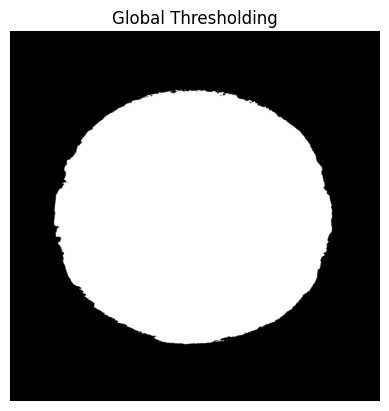


Menu:
1. Global Thresholding
2. Adaptive Thresholding
   a. Mean Adaptive Thresholding
   b. Gaussian Adaptive Thres holding
3. Otsu's Method
4. Exit


Choose an option (1-4):  2
Choose the adaptive method (a for Mean, b for Gaussian):  a


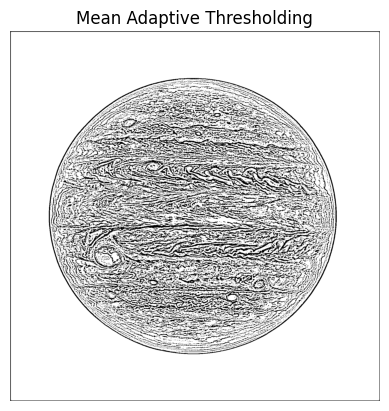


Menu:
1. Global Thresholding
2. Adaptive Thresholding
   a. Mean Adaptive Thresholding
   b. Gaussian Adaptive Thres holding
3. Otsu's Method
4. Exit


Choose an option (1-4):  2
Choose the adaptive method (a for Mean, b for Gaussian):  b


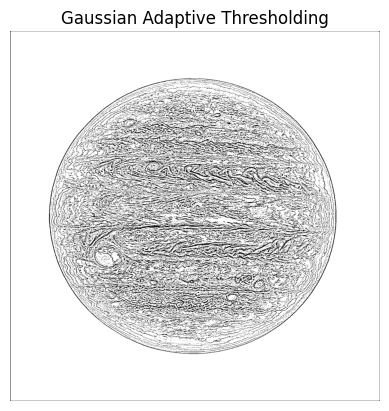


Menu:
1. Global Thresholding
2. Adaptive Thresholding
   a. Mean Adaptive Thresholding
   b. Gaussian Adaptive Thres holding
3. Otsu's Method
4. Exit


Choose an option (1-4):  3


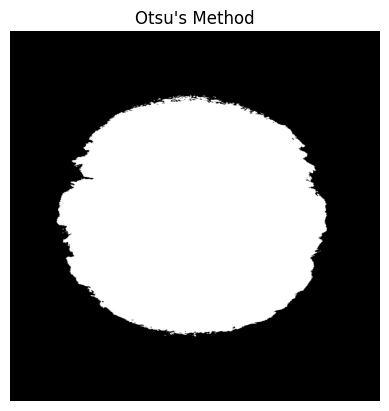


Menu:
1. Global Thresholding
2. Adaptive Thresholding
   a. Mean Adaptive Thresholding
   b. Gaussian Adaptive Thres holding
3. Otsu's Method
4. Exit


Choose an option (1-4):  4


Exiting...


In [2]:
""" Image Segmentation """

import cv2
import numpy as np
import matplotlib.pyplot as plt

def global_thresholding(image, threshold):
    _, thresholded_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return thresholded_image

def adaptive_thresholding(image, method='mean'):
    if method == 'mean':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    elif method == 'gaussian':
        return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    else:
        raise ValueError("Invalid method. Choose 'mean' or 'gaussian'.")

def otsus_method(image):
    _, thresholded_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded_image

def display_image(title, image):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.pause(5)  # Display for 5 seconds
    plt.close()   # Close the plot after pause

def main():
    # Load the image
    image_path = input("Enter the path of the image: ")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print("Error: Could not open or find the image.")
        return

    while True:
        print("\nMenu:")
        print("1. Global Thresholding")
        print("2. Adaptive Thresholding")
        print("   a. Mean Adaptive Thresholding")
        print("   b. Gaussian Adaptive Thres holding")
        print("3. Otsu's Method")
        print("4. Exit")

        choice = input("Choose an option (1-4): ")

        if choice == '1':
            threshold = int(input("Enter the threshold value (0-255): "))
            result = global_thresholding(image, threshold)
            display_image("Global Thresholding", result)

        elif choice == '2':
            method_choice = input("Choose the adaptive method (a for Mean, b for Gaussian): ")
            if method_choice == 'a':
                result = adaptive_thresholding(image, method='mean')
                display_image("Mean Adaptive Thresholding", result)
            elif method_choice == 'b':
                result = adaptive_thresholding(image, method='gaussian')
                display_image("Gaussian Adaptive Thresholding", result)
            else:
                print("Invalid choice. Please try again.")

        elif choice == '3':
            result = otsus_method(image)
            display_image("Otsu's Method", result)

        elif choice == '4':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()

# A3
**Image Transformation**

(918, 1491)
1.Image Scaling
2.Image Translation
3.Image Reflection
4.Image Rotation
5.Image Shearing
6.Exit


Enter your choice -  1


(918, 1491)
(1836, 2982)


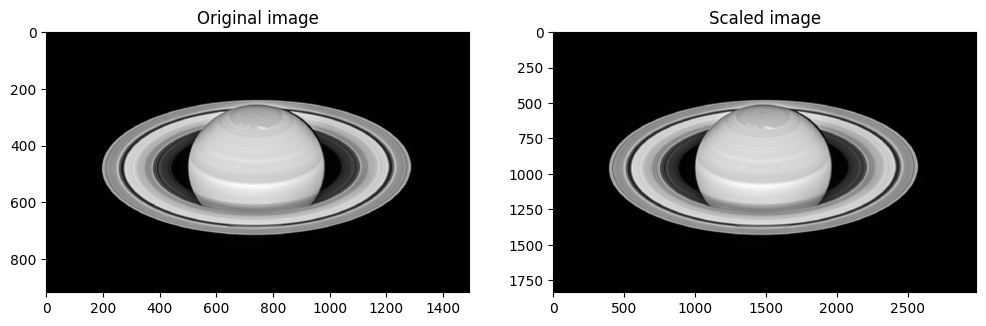

1.Image Scaling
2.Image Translation
3.Image Reflection
4.Image Rotation
5.Image Shearing
6.Exit


Enter your choice -  2
Enter the translation in x-axis -  50
Enter the translation in y-axis -  50


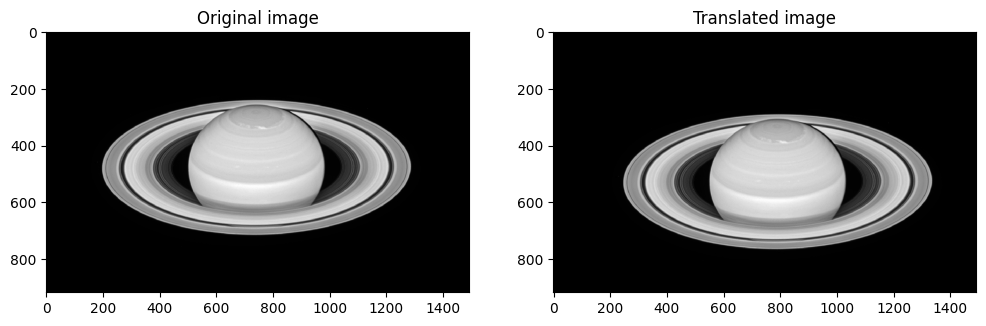

1.Image Scaling
2.Image Translation
3.Image Reflection
4.Image Rotation
5.Image Shearing
6.Exit


Enter your choice -  3


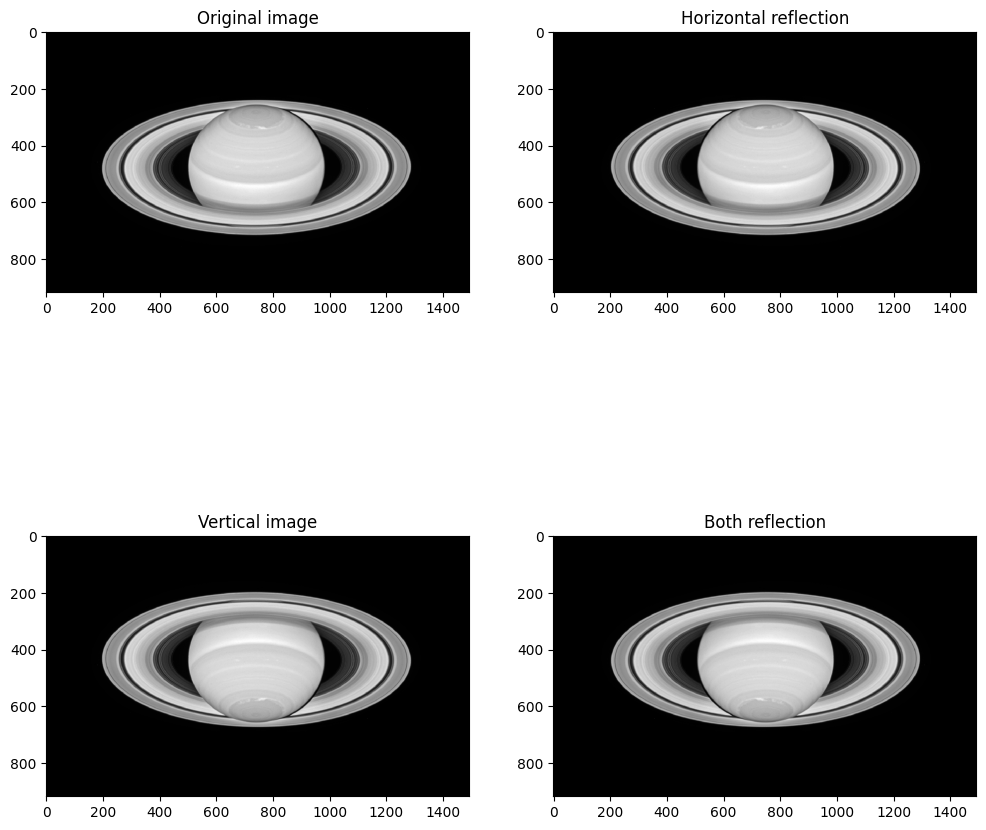

1.Image Scaling
2.Image Translation
3.Image Reflection
4.Image Rotation
5.Image Shearing
6.Exit


Enter your choice -  4
Enter the angle for rotation -  45
Enter 1 for clockwise 0 for anti-cloickwise -  1


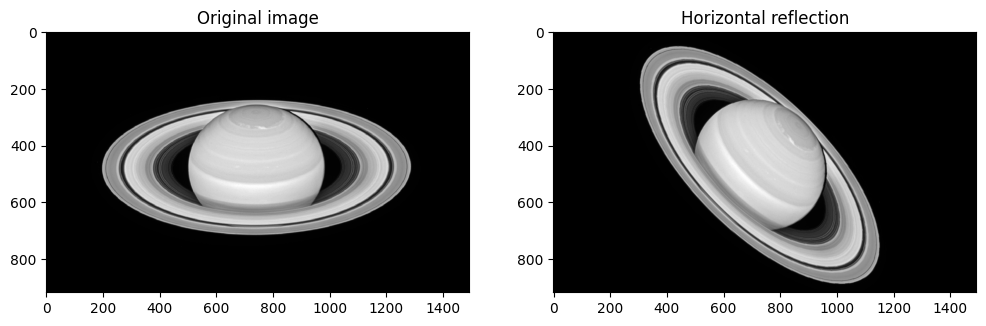

1.Image Scaling
2.Image Translation
3.Image Reflection
4.Image Rotation
5.Image Shearing
6.Exit


Enter your choice -  5
Enter degree of shear along x-axis (suggest small values like 0.1) -  0.5
Enter degree of shear along y-axis (suggest small values like 0.1) -  0.3


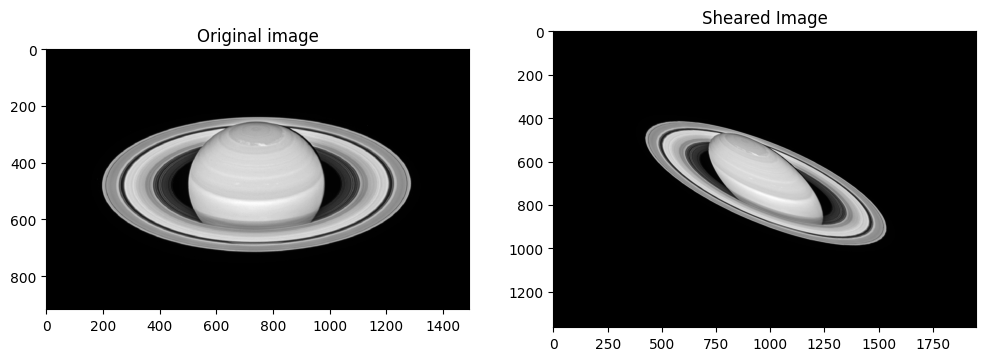

1.Image Scaling
2.Image Translation
3.Image Reflection
4.Image Rotation
5.Image Shearing
6.Exit


Enter your choice -  6


In [5]:
""" Image Registration """

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('D://Balance//College and Studies//TY//CV & DL Lab//A3//A3//saturn.png', cv2.IMREAD_GRAYSCALE)
r, c = image.shape
print(image.shape)
choice = 0
while choice != 6:
    print("1.Image Scaling")
    print("2.Image Translation")
    print("3.Image Reflection")
    print("4.Image Rotation")
    print("5.Image Shearing")
    print("6.Exit")

    choice = int(input("Enter your choice - "))

    if choice == 1:
        scale = 2

        r_n = r*scale
        c_n = c*scale
        scaled_image = cv2.resize(
            image, (c_n, r_n), interpolation=cv2.INTER_NEAREST)

        plt.figure(figsize=(12, 12))
        plt.subplot(1, 2, 1)
        plt.title("Original image")
        print(image.shape)
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title("Scaled image")
        plt.imshow(scaled_image, cmap='gray')
        print(scaled_image.shape)
        plt.show()

    if choice == 2:
        tx = int(input("Enter the translation in x-axis - "))
        ty = int(input("Enter the translation in y-axis - "))
        matrix = np.float32([[1, 0, tx], [0, 1, ty]])

        translated_image = cv2.warpAffine(image, matrix, (c, r))

        plt.figure(figsize=(12, 12))
        plt.subplot(1, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title("Translated image")
        plt.imshow(translated_image, cmap='gray')
        plt.show()

    if choice == 3:
        h_reflection = cv2.flip(image, 1)
        v_reflection = cv2.flip(image, 0)
        both_reflection = cv2.flip(image, -1)

        plt.figure(figsize=(12, 12))
        plt.subplot(2, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')
        plt.subplot(2, 2, 2)
        plt.title("Horizontal reflection")
        plt.imshow(h_reflection, cmap='gray')
        plt.subplot(2, 2, 3)
        plt.title("Vertical image")
        plt.imshow(v_reflection, cmap='gray')
        plt.subplot(2, 2, 4)
        plt.title("Both reflection")
        plt.imshow(both_reflection, cmap='gray')

        plt.show()

    if choice == 4:
        angle = int(input("Enter the angle for rotation - "))
        direction = int(
            input("Enter 1 for clockwise 0 for anti-cloickwise - "))
        center = (c//2, r//2)

        if direction == 1:
            angle = -angle
        elif direction == 0:
            angle = angle
        else:
            print(
                "Invalid input! Please enter 1 for clockwise or 0 for counterclockwise.")
            exit()

        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        # parameters - center of image , angle of rotiation, scaling factor

        rotated_image = cv2.warpAffine(image, rotation_matrix, (c, r))

        plt.figure(figsize=(12, 12))
        plt.subplot(1, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')
        plt.subplot(1, 2, 2)
        plt.title("Rotated image")
        plt.imshow(rotated_image, cmap='gray')
        plt.show()

    if choice == 5:
        sx = float(input("Enter degree of shear along x-axis (suggest small values like 0.1) - "))
        sy = float(input("Enter degree of shear along y-axis (suggest small values like 0.1) - "))

        shear_matrix = np.float32([[1, sx, 0], [sy, 1, 0]])

        new_c = int(c + abs(sx * r))
        new_r = int(r + abs(sy * c))

        sheared_image = cv2.warpAffine(image, shear_matrix, (new_c, new_r))

        plt.figure(figsize=(12, 12))
        plt.subplot(1, 2, 1)
        plt.title("Original image")
        plt.imshow(image, cmap='gray')

        plt.subplot(1, 2, 2)
        plt.title("Sheared Image")
        plt.imshow(sheared_image, cmap='gray')
        plt.show()


# A4
**Visualize and Understand CNN**

Enter the path to the image:  D:\Balance\College and Studies\TY\CV & DL Lab\A4\A4\input.png



--- Menu ---
1. Show Original Image
2. Apply Convolution
3. Apply Activation (ReLU)
4. Apply Pooling
5. Exit


Enter your choice:  1


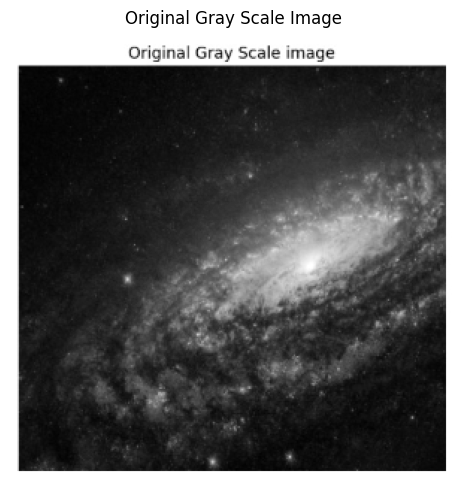


--- Menu ---
1. Show Original Image
2. Apply Convolution
3. Apply Activation (ReLU)
4. Apply Pooling
5. Exit


Enter your choice:  2


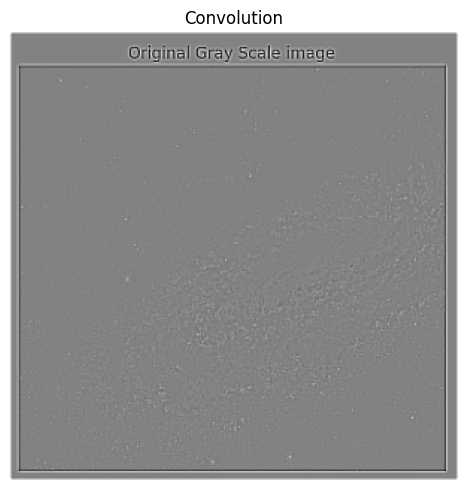


--- Menu ---
1. Show Original Image
2. Apply Convolution
3. Apply Activation (ReLU)
4. Apply Pooling
5. Exit


Enter your choice:  3


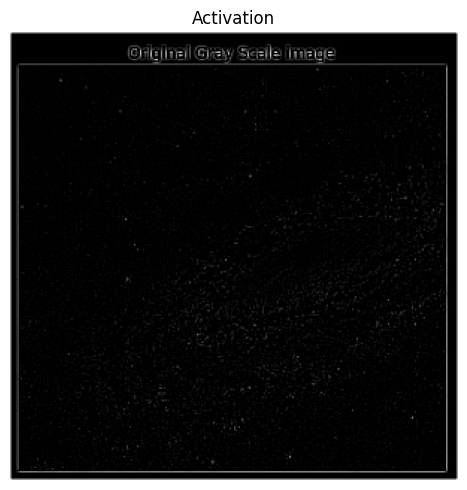


--- Menu ---
1. Show Original Image
2. Apply Convolution
3. Apply Activation (ReLU)
4. Apply Pooling
5. Exit


Enter your choice:  4


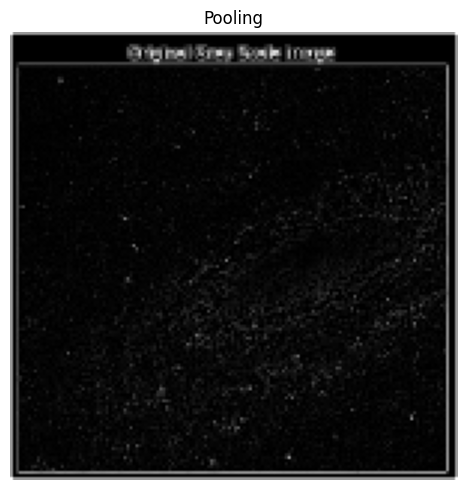


--- Menu ---
1. Show Original Image
2. Apply Convolution
3. Apply Activation (ReLU)
4. Apply Pooling
5. Exit


Enter your choice:  5


Exiting...


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')


def load_and_preprocess_image(image_path):
    """Load and preprocess the image."""
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=1)
    image = tf.image.resize(image, size=[300, 300])
    return image


def show_image(image, title, cmap='gray'):
    """Display an image."""
    img = tf.squeeze(image).numpy()
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()


def apply_convolution(image, kernel):
    """Apply convolution to the image."""
    kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
    kernel = tf.cast(kernel, dtype=tf.float32)
    image = tf.expand_dims(image, axis=0)  # Add batch dimension

    conv_fn = tf.nn.conv2d
    image_filter = conv_fn(
        input=image,
        filters=kernel,
        strides=1,
        padding='SAME'
    )
    return image_filter


def apply_activation(image_filter):
    """Apply ReLU activation to the filtered image."""
    relu_fn = tf.nn.relu
    image_detect = relu_fn(image_filter)
    return image_detect


def apply_pooling(image_detect):
    """Apply max pooling to the activated image."""
    pool = tf.nn.pool
    image_condense = pool(
        input=image_detect,
        window_shape=(2, 2),
        pooling_type='MAX',
        strides=(2, 2),
        padding='SAME'
    )
    return image_condense


def main():
    image_path = input("Enter the path to the image: ")

    # Load kernel
    kernel = tf.constant([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])
    try:
        image = load_and_preprocess_image(image_path)

        while True:
            print("\n--- Menu ---")
            print("1. Show Original Image")
            print("2. Apply Convolution")
            print("3. Apply Activation (ReLU)")
            print("4. Apply Pooling")
            print("5. Exit")
            
            choice = input("Enter your choice: ")

            if choice == '1':
                show_image(image, title="Original Gray Scale Image")
            elif choice == '2':
                image_filter = apply_convolution(image, kernel)
                show_image(tf.squeeze(image_filter), title="Convolution")
            elif choice == '3':
                image_filter = apply_convolution(image, kernel)
                image_detect = apply_activation(image_filter)
                show_image(tf.squeeze(image_detect), title="Activation")
            elif choice == '4':
                image_filter = apply_convolution(image, kernel)
                image_detect = apply_activation(image_filter)
                image_condense = apply_pooling(image_detect)
                show_image(tf.squeeze(image_condense), title="Pooling")
            elif choice == '5':
                print("Exiting...")
                break
            else:
                print("Invalid choice. Please try again.")

    except Exception as e:
        print(f"An error occurred: {e}")


if __name__ == "__main__":
    main()


# A5
**Object Detection**

100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:02<00:00, 2.30MB/s]



Menu:
1. Load and Detect Objects in Image
2. Exit


Enter your choice (1/2):  1
Enter the path to the image file:  D:\Balance\College and Studies\TY\CV & DL Lab\A5\A5\girrafe.jpg



0: 352x640 4 persons, 1 giraffe, 171.7ms
Speed: 8.6ms preprocess, 171.7ms inference, 11.3ms postprocess per image at shape (1, 3, 352, 640)


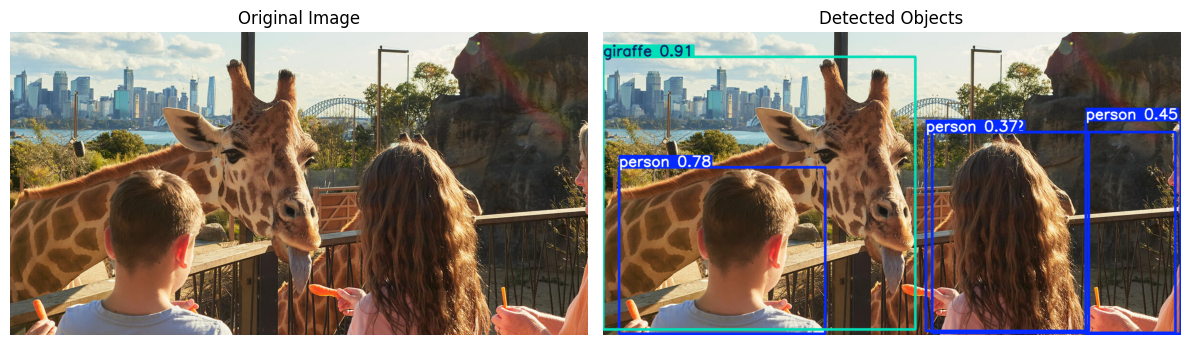


Menu:
1. Load and Detect Objects in Image
2. Exit


Enter your choice (1/2):  2


Exiting...


In [7]:
# Import required libraries
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Function to display original and annotated images side-by-side
def display_images(original_img_rgb, annotated_img_rgb):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(annotated_img_rgb)
    axes[1].set_title('Detected Objects')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Main function to run the program
def main():
    # Load the YOLO model
    model = YOLO('yolov8n.pt')

    while True:
        # Display menu options
        print("\nMenu:")
        print("1. Load and Detect Objects in Image")
        print("2. Exit")

        # Get user choice
        choice = input("Enter your choice (1/2): ")

        if choice == '1':
            # Prompt user for image path
            img_path = input("Enter the path to the image file: ")

            # Load the image
            original_img = cv2.imread(img_path)
            if original_img is None:
                print("Error: Image not found or unable to load.")
                continue

            # Convert BGR to RGB for display purposes
            original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

            # Run YOLO object detection
            results = model(original_img)

            # Extract results (works for both lists or single result objects)
            result = results[0] if isinstance(results, list) else results

            # Get the annotated image
            annotated_img = result.plot()

            # Convert BGR to RGB for display
            annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

            # Display the images
            display_images(original_img_rgb, annotated_img_rgb)

        elif choice == '2':
            print("Exiting...")
            break

        else:
            print("Invalid choice. Please enter 1 or 2.")

# Run the main function when the script is executed
if __name__ == "__main__":
    main()
